# Pymaceuticals Inc.
---

### Data Prep & Cleaning
 

In [1]:
# Dependencies and Setup
# * ----------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as st
import numpy as np

plt.rcParams['font.size'] = 7
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (6.1, 4.05)

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path,
                             dtype= {'Drug Regimen': 'category',
                                     'Sex': 'category',
                                     'Age_months': 'Int8',
                                     'Weight': 'Int8'})
study_results = pd.read_csv(study_results_path,
                            dtype= {'Timepoint': 'Int16',
                                    'Tumor Volume (mm3)': 'float32',
                                    'Metastatic Sites': 'Int8'})

# Combine the data into a single DataFrame
merged_df = pd.merge(
    left= study_results,
    right= mouse_metadata,
    how='left',
    on= ['Mouse ID']
)

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Mouse ID            1893 non-null   object  
 1   Timepoint           1893 non-null   Int16   
 2   Tumor Volume (mm3)  1893 non-null   float32 
 3   Metastatic Sites    1893 non-null   Int8    
 4   Drug Regimen        1893 non-null   category
 5   Sex                 1893 non-null   category
 6   Age_months          1893 non-null   Int8    
 7   Weight (g)          1893 non-null   int64   
dtypes: Int16(1), Int8(2), category(2), float32(1), int64(1), object(1)
memory usage: 68.9+ KB


In [3]:
# Checking the number of mice.
merged_df['Mouse ID'].nunique()

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicated_mouse['Mouse ID'].unique()

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786800,0,Propriva,Female,21,26
360,g989,5,47.570393,0,Propriva,Female,21,26
620,g989,10,51.745155,0,Propriva,Female,21,26
681,g989,10,49.880527,0,Propriva,Female,21,26
815,g989,15,51.325851,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
duplicated_mouse = merged_df.loc[merged_df['Mouse ID'] == 'g989']
duplicated_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786800,0,Propriva,Female,21,26
360,g989,5,47.570393,0,Propriva,Female,21,26
620,g989,10,51.745155,0,Propriva,Female,21,26
681,g989,10,49.880527,0,Propriva,Female,21,26
815,g989,15,51.325851,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


#### Insight:
Since mouse 'g989' have several duplicates in our dataset, we have to remove it (we run by the assumption that we don't have sufficient information to declare which of the records is more accurate given the the duplicated timepoints).  

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.loc[~merged_df['Mouse ID'].isin(duplicated_mouse['Mouse ID'])]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [9]:
def calculate_sem(data):
    return st.sem(data)

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = (
    merged_df
    .loc[~merged_df['Mouse ID'].isin(duplicated_mouse['Mouse ID'])]
    .groupby('Drug Regimen')
    .agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', calculate_sem]})
    .rename(columns={'Tumor Volume (mm3)': 'Mean Tumor Volume'})
    .droplevel(0, axis=1))

# * Renaming the columns
summary_statistics.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']

# * Retriving the summary table
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675743,41.557808,24.947767,4.994774,0.329346
Ceftamin,52.591171,51.776157,39.290176,6.268188,0.469821
Infubinol,52.884792,51.820587,43.128689,6.567243,0.492236
Ketapril,55.235638,53.698742,68.553482,8.279709,0.603860
Naftisol,54.331566,52.509285,66.173630,8.134708,0.596466
Placebo,54.033581,52.288933,61.168022,7.821003,0.581331
Propriva,52.320930,50.446266,43.851990,6.622085,0.544332
Ramicane,40.216747,40.673233,23.486710,4.846308,0.320955
Stelasyn,54.233150,52.431736,59.450661,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
(merged_df
 .loc[~merged_df['Mouse ID'].isin(duplicated_mouse['Mouse ID'])]
 .pivot_table(
     index=['Drug Regimen'],
     values= 'Tumor Volume (mm3)',
     aggfunc= ['mean', 'median', 'var', 'std', st.sem])
     .droplevel(1, axis=1)
     .rename(columns={'mean': 'Mean Tumor Volume', 
                      'median': 'Median Tumor Volume', 
                      'var': 'Tumor Volume Variance', 
                      'std': 'Tumor Volume Std. Dev.', 
                      'sem': 'Tumor Volume Std. Err.'})
                      .style.background_gradient(cmap='magma', axis=0))

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675743,41.557808,24.947767,4.994774,0.329346
Ceftamin,52.591171,51.776157,39.290176,6.268188,0.469821
Infubinol,52.884792,51.820587,43.128689,6.567243,0.492236
Ketapril,55.235638,53.698742,68.553482,8.279709,0.603860
Naftisol,54.331566,52.509285,66.173630,8.134708,0.596466
Placebo,54.033581,52.288933,61.168022,7.821003,0.581331
Propriva,52.320930,50.446266,43.851990,6.622085,0.544332
Ramicane,40.216747,40.673233,23.486710,4.846308,0.320955
Stelasyn,54.233150,52.431736,59.450661,7.710419,0.573111


#### Insight: 
- The following drug regimens had the most positive effect on mice over the timepoints of the study (a key indicator for the effectiveness of a given medicine can be the tumor size in cubic millimeters over the whole time period, in particular the mean, median and variance results, **the lower the results are over the timepoints of the study, the better the effect of the medicine on mice**):
    - Capomiulin
    - Caftamin
    - Infubinol
    - Ramicane

## Bar and Pie Charts

In [12]:
df = merged_df.loc[~merged_df['Mouse ID'].isin(duplicated_mouse['Mouse ID'])]

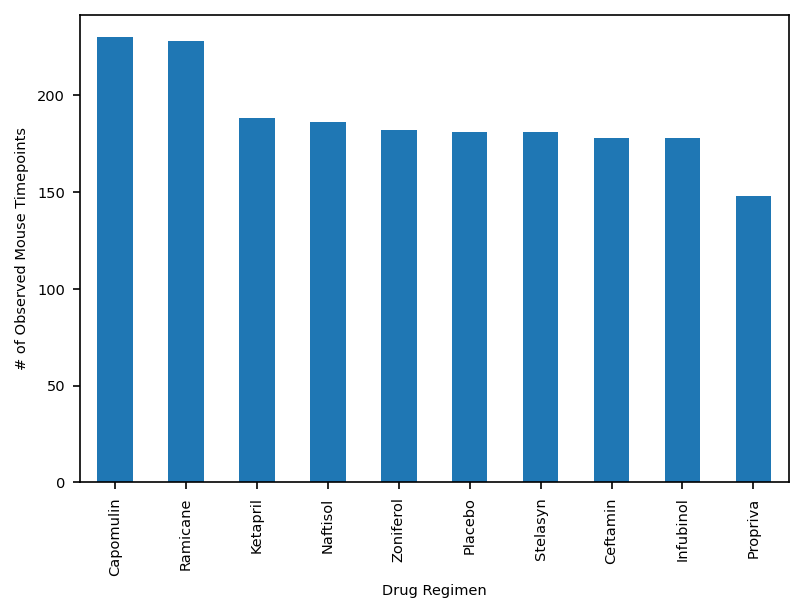

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
ax = (df
 .groupby(df['Drug Regimen'])[['Mouse ID']].count()
 .sort_values('Mouse ID', ascending=False)
 .plot.bar(
     ylabel= "# of Observed Mouse Timepoints",
     legend=False
 ))
ax.tick_params(axis='both',
               which='both',
               direction='out',
               color='black')
plt.show()

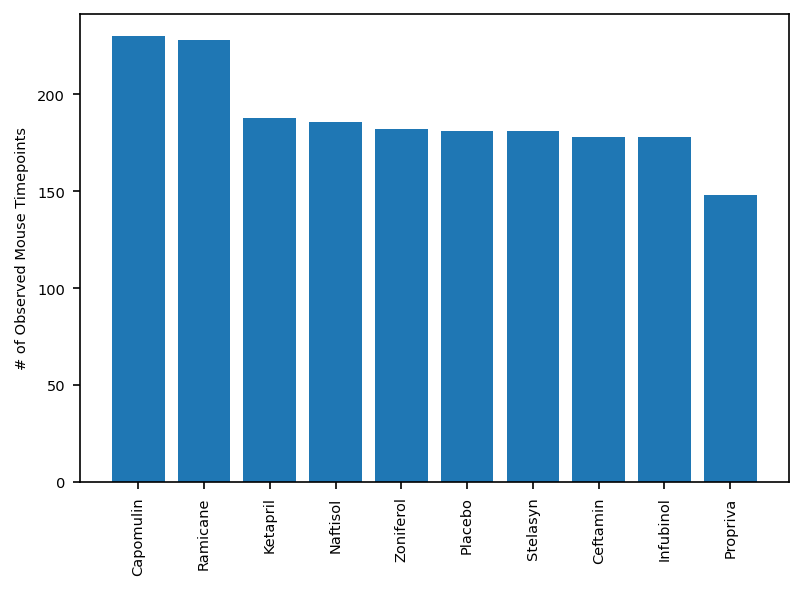

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
total_rows = (df.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False))

plt.bar(total_rows.index, total_rows.values)
plt.ylabel('# of Observed Mouse Timepoints')
plt.tick_params(axis='x', labelrotation = 90)
plt.show()


#### Insight: 
- Ceftamin and Infubiol were in top four the amount, however, relative to the dataset we didn't have enough observations as opposed other medicines. 
- In contrast, Capomulin and Ramicane were in top four the amount and had the highest amount of observations over the timepoints of our study.In general, the amount of observations over the timepoints directly affects the quality of our results and the level of confidence we have in our results. 

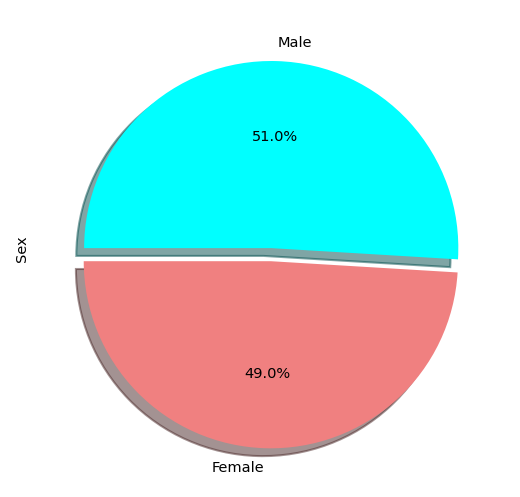

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
explode_1 = [0.07, 0]
df.groupby('Sex')['Mouse ID'].count().plot.pie(startangle=180,
                                               autopct='%1.1f%%',
                                               colors = ['lightcoral', 'cyan'],
                                               label= 'Sex',
                                               shadow= True,
                                               explode=explode_1);

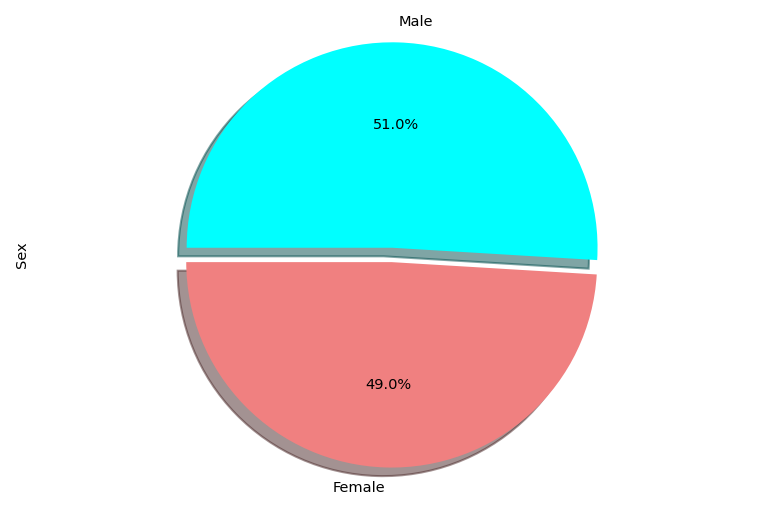

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode_2 = [0.07, 0]
sex_counts = df.groupby('Sex')['Mouse ID'].count()

plt.pie(sex_counts,
        labels=sex_counts.index,
        autopct='%1.1f%%',
        startangle=180,
        colors = ['lightcoral', 'cyan'],
        shadow=True,
        explode=explode_2)
plt.ylabel('Sex')
plt.axis('equal')

plt.show()

#### Insight:
Even though we had more female mice in our study, the difference between males and females in terms of percentage spread is not significant. 

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = df.groupby('Mouse ID')[['Timepoint']].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
cleaned_merged = pd.merge(
    left = clean_df,
    right=last_timepoints,
    how='left',
    on = ['Mouse ID']
)
cleaned_merged.rename(columns=({'Timepoint_x': 'Timepoint', 'Timepoint_y': 'Last Timepoint'}), inplace=True)
cleaned_merged


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,f932,0,45.000000,0,Ketapril,Male,15,29,0
2,g107,0,45.000000,0,Ketapril,Female,2,29,35
3,a457,0,45.000000,0,Ketapril,Female,11,30,10
4,c819,0,45.000000,0,Ketapril,Male,21,25,40
...,...,...,...,...,...,...,...,...,...
1875,r944,45,41.581520,2,Capomulin,Male,12,25,45
1876,u364,45,31.023924,3,Capomulin,Male,18,17,45
1877,p438,45,61.433891,1,Ceftamin,Female,11,26,45
1878,x773,45,58.634972,4,Placebo,Female,21,30,45


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = {}

grouped_df = clean_df.loc[clean_df['Drug Regimen'].isin(treatment_regimens)].groupby('Drug Regimen')

for group_name, group_data in grouped_df:
    tumor_volume = group_data['Tumor Volume (mm3)']
    tumor_volume_data[group_name] = tumor_volume.tolist()
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    iqr = st.iqr(tumor_volume)

    # * Find the lower bound and upper bound of the tumor volume
    lower_bound = st.scoreatpercentile(tumor_volume, 25) - (1.5 * iqr)
    upper_bound = st.scoreatpercentile(tumor_volume, 75) + (1.5 * iqr)
    
    # * Locate the rows that contain potential outliers
    potential_outliers = group_data.loc[(group_data['Tumor Volume (mm3)'] < lower_bound) | (group_data['Tumor Volume (mm3)'] > upper_bound)]

    print("Drug Regimen:", group_name)
    print("Lower Quartile:", st.scoreatpercentile(tumor_volume, 25))
    print("Upper Quartile:", st.scoreatpercentile(tumor_volume, 75))
    print("IQR:", iqr)
    print("Lower Bound:", lower_bound)
    print("Upper Bound:", upper_bound)
    print("Potential Outliers:")
    print(potential_outliers)
    print()



    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 


Drug Regimen: Capomulin
Lower Quartile: 37.68593215942383
Upper Quartile: 45.0
IQR: 7.314067840576172
Lower Bound: 26.71483039855957
Upper Bound: 55.97110176086426
Potential Outliers:
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
1652     s185         40           25.472143                 1    Capomulin   
1849     s185         45           23.343597                 1    Capomulin   

         Sex  Age_months  Weight (g)  
1652  Female           3          17  
1849  Female           3          17  

Drug Regimen: Ceftamin
Lower Quartile: 47.2084264755249
Upper Quartile: 56.801438331604004
IQR: 9.593011856079102
Lower Bound: 32.81890869140625
Upper Bound: 71.19095611572266
Potential Outliers:
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []

Drug Regimen: Infubinol
Lower Quartile: 47.31235313415527
Upper Quartile: 57.314443588256836
IQR: 10.002090454101562
Lower Bo

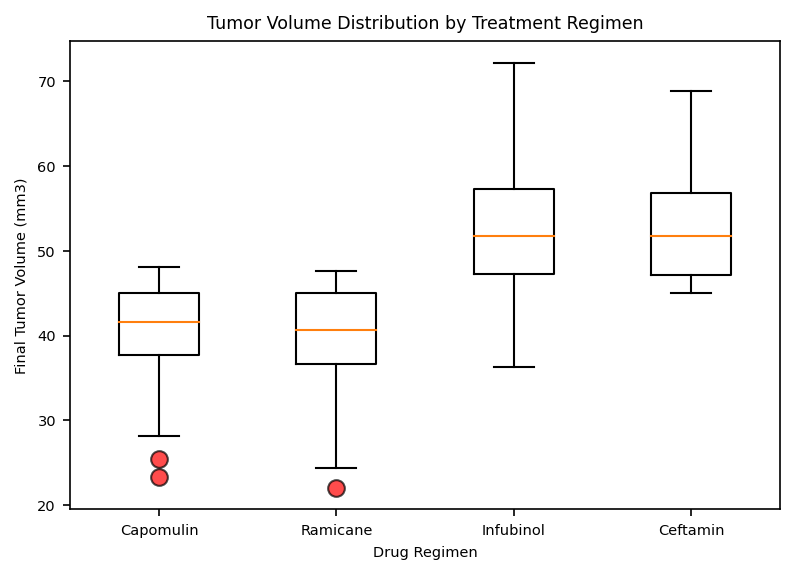

In [19]:
# Customize flierprops to color outliers in red
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none', alpha=0.7)

# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
boxplot_data = [tumor_volume_data[regimen] for regimen in treatment_regimens]

plt.boxplot(boxplot_data, labels=treatment_regimens, flierprops=flierprops)
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Tumor Volume Distribution by Treatment Regimen')
plt.show()

## Line and Scatter Plots

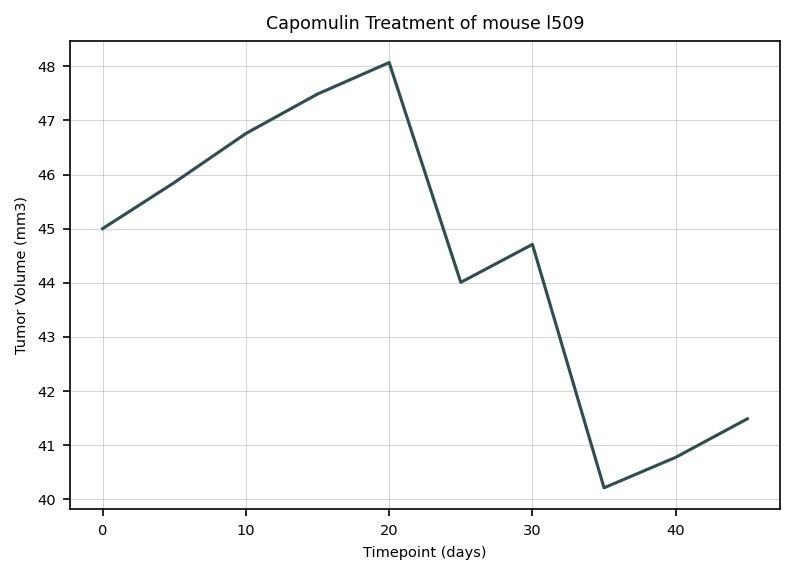

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse = clean_df.loc[(clean_df['Drug Regimen'] == 'Capomulin') & (clean_df['Mouse ID'] == 'l509')]
plt.plot(single_mouse['Timepoint'], single_mouse['Tumor Volume (mm3)'], color='darkslategrey')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of mouse l509')
plt.grid(linewidth= 0.25)
plt.show()

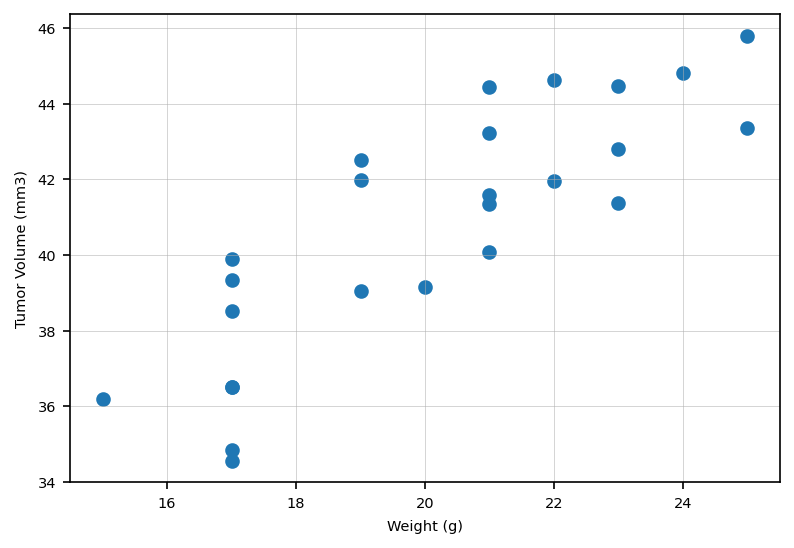

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cor_w_tomur = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
cor_mean = cor_w_tomur.groupby(['Mouse ID', 'Weight (g)'])[['Tumor Volume (mm3)']].mean().reset_index()
# plt.scatter(cor_mean['Weight (g)'], cor_mean['Tumor Volume (mm'])
plt.scatter(cor_mean['Weight (g)'], cor_mean['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(linewidth= 0.25)
plt.show()

## Correlation and Regression

In [22]:
cor_mean.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963634
1,b742,21,40.083698
2,f966,17,36.505974
3,g288,19,41.990097
4,g316,22,44.613342


In [23]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x = cor_mean['Weight (g)'].to_numpy()
y = cor_mean['Tumor Volume (mm3)'].to_numpy()

# ? The "slope" is a number that tells us how steep or slanted the line is.
# ? The "intercept" is a special point where the line touches the up-down direction (y-axis).
# ? The "r-value" is a number that tells us how closely the line matches the dots.
# ? The "p-value" is another number that tells us if the line and dots match really well or just a little.
# ? The "std_err" is like a special ruler that tells us how much the dots are spread out.
slope, intercept, r_value, p_value, std_err = st.linregress(x, y)



# ? To find the predicted discrate values of Y we need to multiply the slope given X value. We then have to add the intercept to create a vector that matches the slope given X. 
predicted = slope * x + intercept


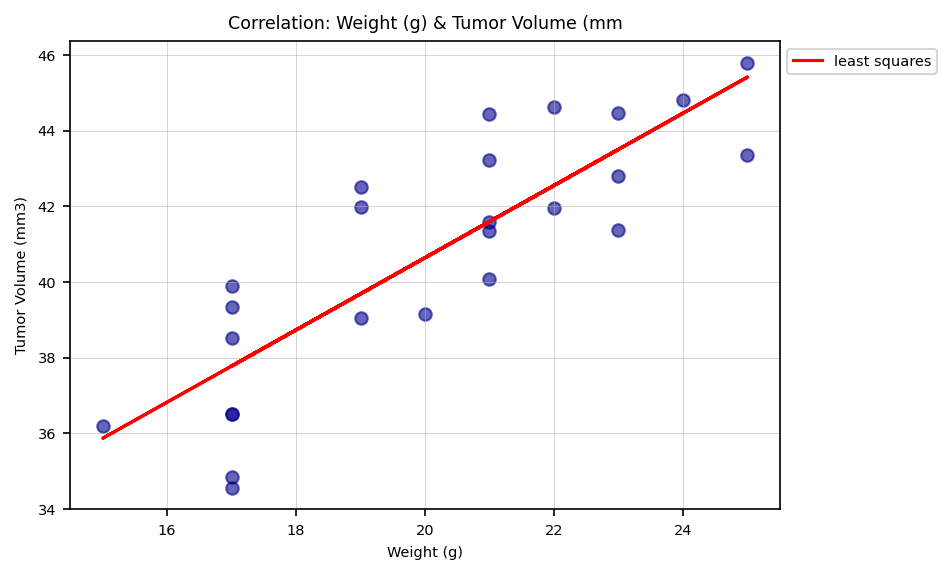

In [24]:
plt.scatter(cor_mean['Weight (g)'], cor_mean['Tumor Volume (mm3)'], alpha = 0.6, color ='darkblue')
plt.plot(x, predicted, color='r', label = 'least squares')
plt.grid(linewidth= 0.25)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Correlation: Weight (g) & Tumor Volume (mm")
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

#### Insight: 
- As we can see there is a positive correlation between the weight(g) and cubic millimeter size of the tumor. One conclusion can be that the heavier the mice are, the greater the size of the tumor. However, given the fact we haven't observed the age of the mice we can't conclude that the weight is a factor for an increase in tumor size (i.e. the age the mice could change and is not necessarily directly related the the weight of the mice). 